## Observations and Insights 

1) There is a positive correlation between mouse weight and tumor volume, suggesting that the weight of the mouse can be contributing to either drug efficacy or that variability in mice diet can be a confounding variable.
2) Of the four treatment regimens observed, Capomuline and Ramicane were more effective than Infubinol and Ceftamine in reducing mice tumor size over time.
3) Only one potential outlier was identified in the case of Infubinol treatment. Statistically, there was low variability. 

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [171]:
# Checking the number of mice.
len(mouse_study_data["Mouse ID"].unique())

249

In [172]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicates = mouse_study_data[mouse_study_data.duplicated(subset =["Mouse ID", "Timepoint"]) == True]
Duplicates['Mouse ID'].unique()


array(['g989'], dtype=object)

In [173]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID = mouse_study_data.loc[mouse_study_data["Mouse ID"] =="g989"]
duplicate_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [174]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = mouse_study_data[mouse_study_data["Mouse ID"].str.contains("g989") ==False]
study_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [175]:
# Checking the number of mice in the clean DataFrame.
len(study_data_clean["Mouse ID"].unique())

248

## Summary Statistics

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volumes = study_data_clean.groupby(["Drug Regimen"])

mean= tumor_volumes["Tumor Volume (mm3)"].mean()
median= tumor_volumes["Tumor Volume (mm3)"].median()
variance= tumor_volumes["Tumor Volume (mm3)"].var()
sd = tumor_volumes["Tumor Volume (mm3)"].std()
SEM = tumor_volumes["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
statistics_summary_table = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Variance":variance,
    "Standard Deviation":sd,
    "SEM":SEM
})

statistics_summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
statistics_summary_table = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

statistics_summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

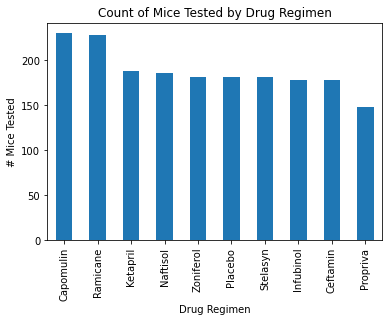

In [178]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = study_data_clean["Drug Regimen"].value_counts().plot(kind="bar")

#labels
plt.title("Count of Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# Mice Tested")

plt.show()


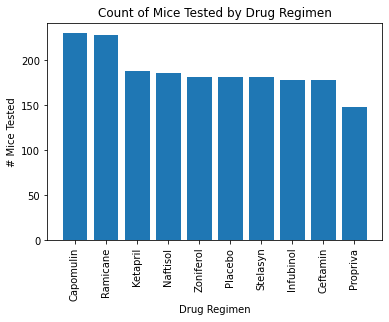

In [179]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = study_data_clean["Drug Regimen"].value_counts()
plt.bar(timepoints.index.values,timepoints.values)

#labels and formatting
plt.title("Count of Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# Mice Tested")

plt.show()


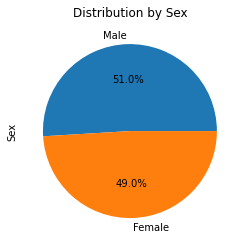

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexes = study_data_clean["Sex"].value_counts()
pie_plot = sexes.plot(kind="pie", autopct="%1.1f%%", title="Distribution by Sex")#labels

plt.show()

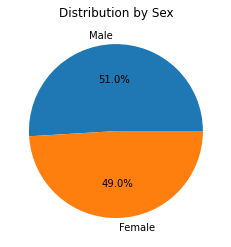

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = study_data_clean["Sex"].value_counts()
plt.pie(sexes.values, labels=sexes.index.values, autopct="%1.1f%%")
plt.title("Distribution by Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [182]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = study_data_clean.groupby(["Mouse ID"])["Timepoint"].max()

#convert series to dataframe by reseting index
final_timepoints = final_timepoints.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
study_data_merged = final_timepoints.merge(study_data_clean, on=["Mouse ID","Timepoint"], how="left")

study_data_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [183]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#loop through each drug in the treatment list and locate the rows in the merged DataFrame that correspond to each treatment
for i in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    #create dataframe to hold final timepoint values for each treatment 
    drug_results = study_data_merged.loc[study_data_merged["Drug Regimen"] == i, "Tumor Volume (mm3)"]

    # add subset 
    tumor_volumes_list.append(drug_results)        
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_results.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    #calculate lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
  
    # print(f"{i} lower bound: {lowerq}")
    # print(f"{i} upper bound: {upperq}")
    # print(f"{i} interquartile: {iqr}")
    # print(f"{i} median: {quartiles[0.5]} ")

    #determine outliers
    outliers = drug_results[(drug_results <= lower_bound) | (drug_results >= upper_bound)]

    print(f"{i} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


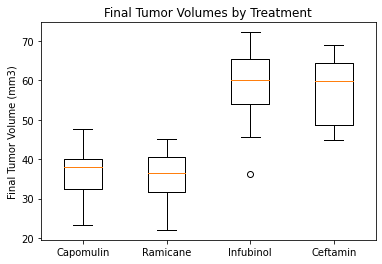

In [184]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volumes_list, labels = treatments)

#labels
plt.title("Final Tumor Volumes by Treatment")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

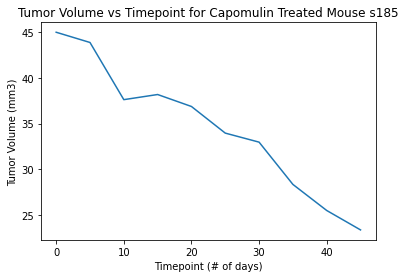

In [185]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#find instances of mouse treated with Capomulin
capomulin_mice = study_data_clean.loc[study_data_clean["Drug Regimen"] =="Capomulin"]
#capomulin_mice.head()
#select a mouse from list
sample_mouse = study_data_clean.loc[study_data_clean["Mouse ID"] =="s185"]

#generate line plot
plt.plot(sample_mouse["Timepoint"], sample_mouse["Tumor Volume (mm3)"])

#labels
plt.title("Tumor Volume vs Timepoint for Capomulin Treated Mouse s185")
plt.xlabel("Timepoint (# of days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


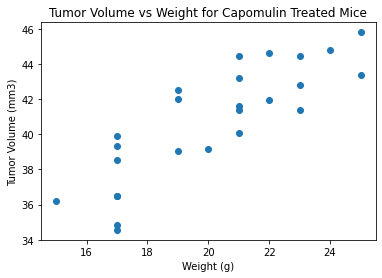

In [186]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#find instances of all mice treated with Capomulin
capomulin_mice = study_data_clean.loc[study_data_clean["Drug Regimen"] =="Capomulin"]

#calculate average tumor volume for capomulin mice
capomulin_volume_averages = capomulin_mice.groupby("Mouse ID").mean()

#generate scatter plot
capomulin_avg_weights = capomulin_volume_averages["Weight (g)"]
capomulin_avg_volumes = capomulin_volume_averages["Tumor Volume (mm3)"]
plt.scatter(capomulin_avg_weights, capomulin_avg_volumes)

#labels
plt.title("Tumor Volume vs Weight for Capomulin Treated Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

Correlation coefficient: 0.84


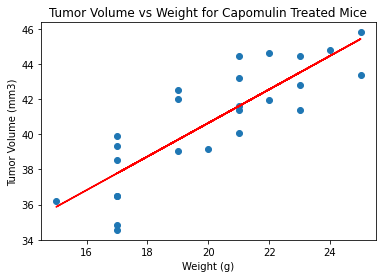

In [187]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_avg_weights, capomulin_avg_volumes)[0],2) #round value

#print correlation
print(f"Correlation coefficient: {correlation}")

#calculate linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_avg_weights, capomulin_avg_volumes)
regression = capomulin_avg_weights * slope + intercept

#plot the linear regression model on top of the previous scatter plot
plt.scatter(capomulin_avg_weights, capomulin_avg_volumes)
plt.plot(capomulin_avg_weights, regression, color="r")

#labels
plt.title("Tumor Volume vs Weight for Capomulin Treated Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()